# Descarga de datos

En este pequeño notebook se intenta recopilar procedimientos para poder descargar las imgaenes de diferentes instrumentos. EL primero que se quiere estudiar es el SDO.

## Solar dynamics Observatory 

Es una misión espacial que estudia la actividad solar a traves de la medición de diferentes características. El objetivo principal de este proyecto es estudiar por qué y como cambia el campo magnético y a partir de análisis poder deducir o predecir como se comporta el clima espacial. Los Objetivos principales de esta misión son:

    + ¿Qué mecanismos llevan a un ciclo solar periódico de 11 años ?
    + ¿Cómo evoluciona el campo magnético a través de las regiones acgivas en la superficie solar ?
    + ¿Cómo es el proceso de reconección magnética en grandes y pequeñas escalas para dar la topología encontrada en el sol?
    + Analizar la irradiancia en todo el espectro electromagnético para poder encontrar regularidades en comportamientos del campo magnético
    + ¿Cuál es la configuración de campo magnético cuando se producen flares, CMEs, erupciones?
    + Se puede determinar la estructura y dinámica del viento solar cerca de la Tierra a partir de la configuración del campo magnético y la estructura atmosférica cerca de la superficie solar?
    + ¿Es posible predecir cambios climaticos en la tierra debidos a la actividad solar?

__[Solar Dynamics Observatory](https://sdo.gsfc.nasa.gov/mission/science.php)__

El SDO contiene instrumentos que proveen observaciones que permiten entender la dinámica solar y la evolución del entorno terrestre. Estos instrumentos pueden medir lo siguiente:

    1.Medida del espectro de irradiancia en el ultravioleta a una rápida cadencia
    2. Medida de efecto Doppler en el disco solar
    3. Medidas de alta resolución de campo magnético longitudinal y vectorial sobre el disco visible
    4. Imágenes de la cromosfera y la corona a varias temperaturas de cadencia rápida
  


## Instrumentos

El SDO tiene a bordo tres experimentos científicos:


+ HMI (Helioseismic and Magnetic Imager)

Es un instrumento designado para estudiar las oscilaciones de campo magnético en la superficie solar (fotosfera). Toma un Terabyte de datos al día. Observa el disco solar  a $6173$ $\dot{A}$ con una resolución de 1 arcosegundo.
<img src="HMI.png">
Provee lso siguientes tipos de datos

   1. dopplergramas (mapas de la velocidad supreficial del sol)
   2. Continuum filtergrams (Fotografías de la fotosfera solar)
   3. Magnetogramas (mapeos de los campo magnéticos fotosfericos)

In [31]:
import json, urllib, numpy as np, matplotlib.pylab as plt, matplotlib.ticker as mtick, requests
import sunpy.map
import drms
from astropy.io import fits
from sunpy.cm import color_tables as ct
#import sunpy.wcs as wcs
from datetime import datetime as dt_obj
import matplotlib.dates as mdates
import matplotlib.colors as mcol
import matplotlib.patches as ptc
from matplotlib.dates import *
import math
#%matplotlib inline
%matplotlib auto

import drms
c = drms.Client()

Using matplotlib backend: MacOSX


In [33]:
keys_hmi, segments = c.query('hmi.M_720s[2012.03.10_23:28:06_TAI]', key=drms.const.all, seg='magnetogram')
url_hmi = 'http://jsoc.stanford.edu' + segments.magnetogram[0] 
photosphere_full_image = fits.getdata(url_hmi)

/Users/macbookpro/anaconda2/lib/python2.7/site-packages/sunpy/map/mapbase.pyc:293: Warning: Missing metadata for observation time: setting observation time to current time
  )c         C` s"   t  j |  j j d t j � d � S(   s   Radius of the sun in meters.t   rsun_reft   meter(   RN   Rt   R1   R�   R   t   radius(   RX   (    (    s0   lib/python2.7/site-packages/sunpy/map/mapbase.pyR�   ?  s    c         C` s�   |  j  j d |  j  j d |  j  j d d � � � } | d k r� t j d t t t j �  j	 j


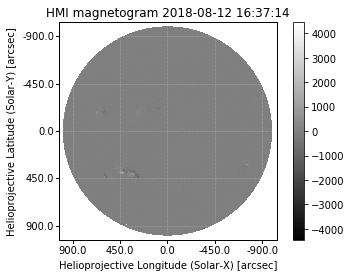

In [35]:
header = dict(keys_hmi.iloc[0])
header["DATE__OBS"] = keys_hmi.DATE__OBS[0]
header["HGLN_OBS"] = 0.0
sunpy.map.Map(photosphere_full_image,header).peek()
plt.show()

In [47]:
keys_ccd, segments = c.query('hmi.sharp_720s[1449][2012.03.06_23:29:06_TAI]', key=drms.const.all, seg='magnetogram')
url_ccd = 'http://jsoc.stanford.edu' + segments.magnetogram[0]   # add the jsoc.stanford.edu suffix to the segment name
photosphere_image = fits.getdata(url_ccd)
photosphere_image1 = fits.open(url_ccd)


/Users/macbookpro/anaconda2/lib/python2.7/site-packages/sunpy/map/mapbase.pyc:293: Warning: Missing metadata for observation time: setting observation time to current time
  )c         C` s"   t  j |  j j d t j � d � S(   s   Radius of the sun in meters.t   rsun_reft   meter(   RN   Rt   R1   R�   R   t   radius(   RX   (    (    s0   lib/python2.7/site-packages/sunpy/map/mapbase.pyR�   ?  s    c         C` s�   |  j  j d |  j  j d |  j  j d d � � � } | d k r� t j d t t t j �  j	 j


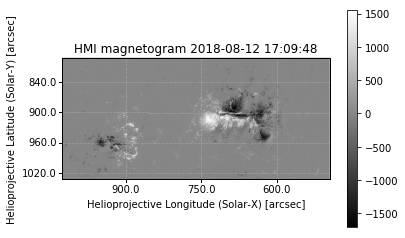

In [76]:
#header = dict(keys_ccd.iloc[0])
#header["DATE__OBS"] = keys_ccd.DATE__OBS[0]
#header["HGLN_OBS"] = 0.0
fig = plt.figure()
sunpy.map.Map(photosphere_image,header).peek()
plt.show()


The dimensions of this image are 480 by 1056 .


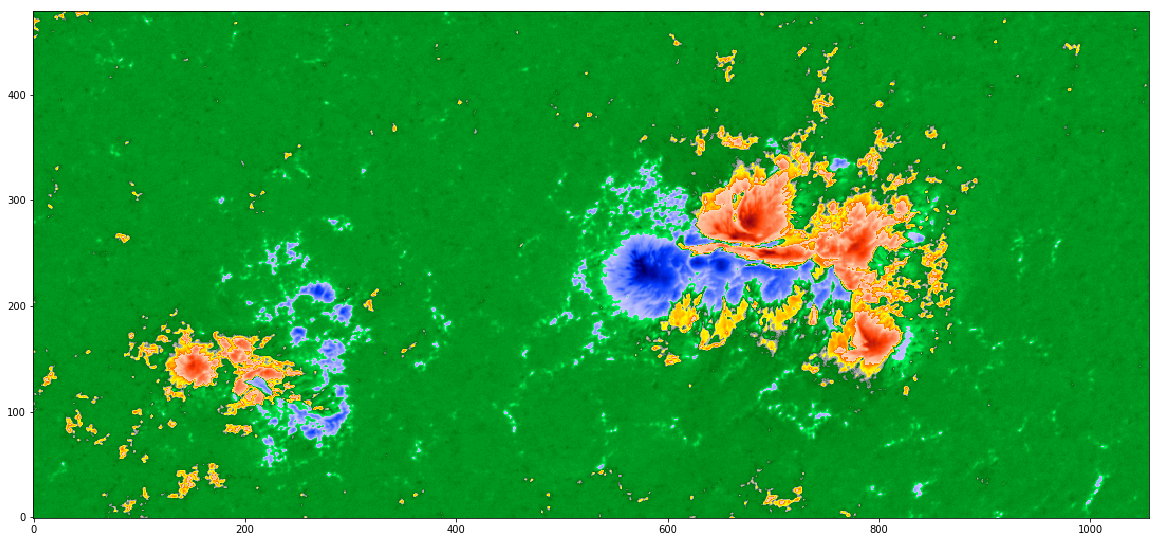

In [74]:
XDIM_CCD = photosphere_image1[1].data.shape[1]
YDIM_CCD = photosphere_image1[1].data.shape[0]
fig = plt.figure()
hmimag = plt.get_cmap('hmimag')
plt.imshow(photosphere_image1[1].data,cmap=hmimag,origin='lower')
fig.set_size_inches(20,20)
print('The dimensions of this image are',photosphere_image1[1].data.shape[0],'by',photosphere_image1[1].data.shape[1],'.')

In [ ]:
fig, ax = plt.subplots(1,1)

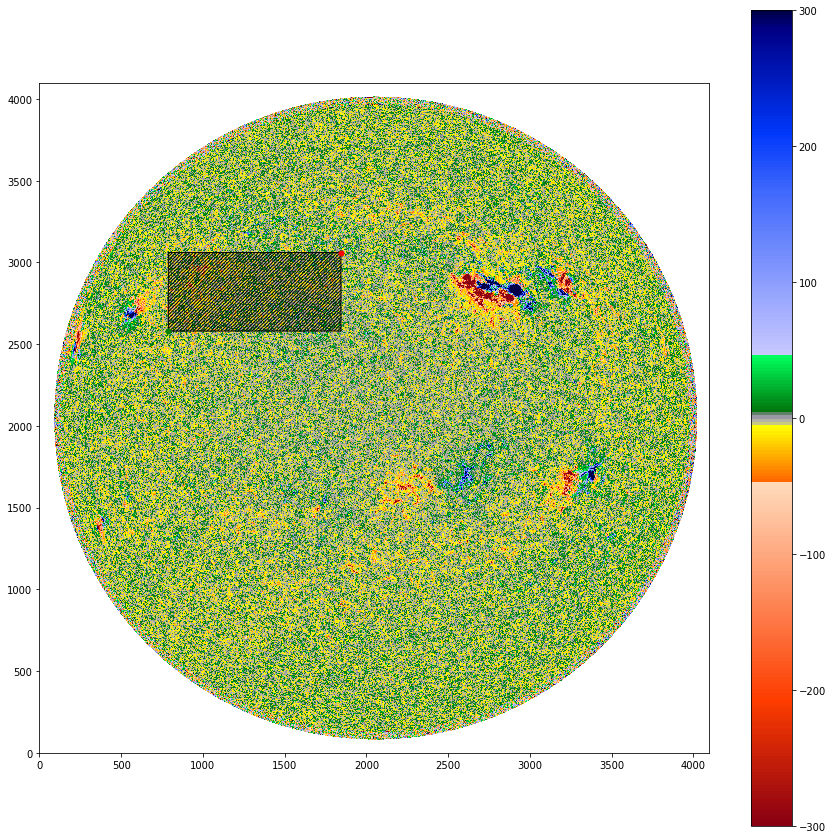

In [57]:
fig, ax = plt.subplots(1,1)
plt.imshow(photosphere_full_image,cmap=hmimag,origin='lower',vmax=300,vmin=-300,extent=[0,4096,0,4096])
y1 = (2048. + keys_ccd.CRPIX2[0] - YDIM_CCD)  
y2 = (2048. + keys_ccd.CRPIX2[0])
x1 = (2048. + keys_ccd.CRPIX1[0] - XDIM_CCD)
x2 = (2048. + keys_ccd.CRPIX1[0])

# draw a box using matplotlib.patches.Rectangle
ax.add_patch(ptc.Rectangle((x1, y1), XDIM_CCD, YDIM_CCD, hatch='///////', fill=False, snap=False))

# plot a green dot at the lower left-hand corner
plt.plot(x1, y1, 'g.', markersize=10.0)

# plot a red dot at the upper right-hand corner
plt.plot(x2, y2, 'r.', markersize=10.0)
fig.set_size_inches(15,15)
plt.colorbar()

paginas de referencia que se están siqguiento 

http://nbviewer.jupyter.org/github/mbobra/calculating-spaceweather-keywords/blob/master/feature_extraction.ipynb
http://nbviewer.jupyter.org/github/mbobra/machine-learning-with-solar-data/blob/master/cme_svm.ipynb
http://hmi.stanford.edu/hminuggets/?p=1428
https://github.com/kbg
https://github.com/SolarDrew/freiburg-2017-02/tree/b9199dbfc7bc1018bea0989a3070c9360d15a923
http://jsoc.stanford.edu/HMI/HMI_observables.png
https://sdo.gsfc.nasa.gov/mission/instruments.php


+ EVE (Variability Experiment)
+ AIA (Atmospheric Imaging Assembly)

### aia

## Iris (Interface Region Imaging Spectrograph)





## SDO (Solar dynamic Observatory)

In [29]:
import numpy as np
import time
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import astropy
from sunpy.net import vso 
import astropy.units as u
from sunpy.map import Map
from astropy.io import fits

In [65]:
dates = []
date_start = datetime(2012,7,1,0,0,0)
date_end = datetime(2012,7,3,23,59,59)
date_sample = 10
date_delta = (date_end-date_start)/date_sample
date_window = timedelta(minutes = 10.0)
temp_date = date_start
while temp_date < date_end:
    dates.append((str(temp_date),str(temp_date+date_window)))
    temp_date += date_delta

In [66]:
tstart, tend = dates[0][0], dates[0][1]

In [99]:
date_start

datetime.datetime(2012, 7, 1, 0, 0)

In [92]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

Fido.search(a.Time('2012/3/4', '2012/3/6'),a.Instrument('lyra') | a.Instrument('rhessi'))

Start Time,End Time,Source,Instrument,Wavelength
str19,str19,str6,str4,str3
2012-03-04 00:00:00,2012-03-06 00:00:00,Proba2,lyra,nan
2012-03-04 00:00:00,2012-03-06 00:00:00,Proba2,lyra,nan
2012-03-04 00:00:00,2012-03-06 00:00:00,Proba2,lyra,nan
Start Time,End Time,Source,Instrument,Wavelength
str19,str19,str6,str6,str3
2012-03-04 00:00:00,2012-03-06 00:00:00,rhessi,rhessi,nan
2012-03-04 00:00:00,2012-03-06 00:00:00,rhessi,rhessi,nan


In [105]:
results = Fido.search(a.Time("2012/1/1", "2012/1/2"),
                      a.Instrument("lyra") | a.Instrument("eve"))
downloaded_files = Fido.fetch(results,path = "./dato_1.fits")

[                                        ========================================
[                                        ========================================


In [131]:
aia

lyra_20120101-000000_lev2_std.fits  lyra_20120102-000000_lev2_std.fits


In [216]:
Fido.search(a.Time("2012/1/1", "2012/1/20"),a.Instrument("lyra") | a.Instrument("aia"))

Start Time,End Time,Source,Instrument,Wavelength
str19,str19,str6,str4,str3
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan


In [117]:
from __future__ import print_function , division
import astropy.units as u
from sunpy.net import Fido , attrs as a

result = Fido.search(a.Time('2012/3/4', '2012/3/6'),
                     a.Instrument('aia'),
                     a.Wavelength(171*u.angstrom) | a.Wavelength(94*u.angstrom))

In [118]:
result

Start Time,End Time,Source,Instrument,Type
float64,float64,float64,float64,float64
Start Time,End Time,Source,Instrument,Type
float64,float64,float64,float64,float64


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma, gammaln

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

dims = np.arange(0, 51)

# log of volume of a sphere with r = 1
log_V_sphere = (np.log(2) + 0.5 * dims * np.log(np.pi)
                - np.log(dims) - gammaln(0.5 * dims))

log_V_cube = dims * np.log(2)

# compute the log of f_k to avoid overflow errors
log_f_k = log_V_sphere - log_V_cube

fig, ax = plt.subplots(figsize=(5, 3.75))
ax.semilogy(dims, np.exp(log_V_cube), '-k',
            label='side-2 hypercube')
ax.semilogy(dims, np.exp(log_V_sphere), '--k',
            label='inscribed unit hypersphere')

ax.set_xlim(0, 50)
ax.set_ylim(1E-13, 1E15)

ax.set_xlabel('Number of Dimensions')
ax.set_ylabel('Hyper-Volume')
ax.legend(loc=3)

plt.show()

ImportError: No module named astroML.plotting